# PCA and Linear Dimensionality Reduction
    Compressing Information While Preserving Signal
## Objective

This notebook provides a systematic treatment of linear dimensionality reduction, focusing on:

- Why dimensionality reduction is needed

- PCA intuition and mathematics (conceptual)

- Variance vs information trade-off

- Component interpretability

- Use cases in finance and risk modeling

It answers:

    How can we reduce dimensionality while preserving meaningful structure and interpretability?

## Business Context – Why PCA in Finance?

PCA is widely used for:

- Risk factor modeling

- Credit portfolio compression

- Correlation structure analysis

- Noise reduction before modeling

- Visualization of high-dimensional behavior

Regulatory environments prefer linear, explainable transformations.

## Imports and Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("D:/GitHub/Data-Science-Techniques/datasets/Unsupervised/synthetic_bank_customer_segmentation.csv")

df.head()

,age,annual_income,avg_monthly_spend,credit_utilization,tenure_years,num_products,risk_score
0,56,106477.0,5268.0,0.06,3.1,1,24.1
1,69,109688.0,2206.0,0.00,2.0,1,22.0
2,46,94629.0,2998.0,0.22,3.2,1,36.1
3,32,49359.0,1725.0,0.17,4.6,1,24.4
4,60,91565.0,1807.0,0.06,21.3,7,17.3


In [4]:
features = [
    "age",
    "annual_income",
    "avg_monthly_spend",
    "credit_utilization",
    "tenure_years",
    "num_products",
    "risk_score"
]

X = df[features]

# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA Intuition (Conceptual)

PCA:

- Finds orthogonal directions of maximum variance

- Orders components by explained variance

- Produces uncorrelated features

✔ Linear
✔ Deterministic
✔ Interpretable

## Fit PCA


In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


## Explained Variance

In [6]:
explained_variance = pca.explained_variance_ratio_

explained_variance


array([0.47811954, 0.21011102, 0.13908979, 0.07337672, 0.06214054,
       0.0237362 , 0.01342619])

## Cumulative Variance Plot

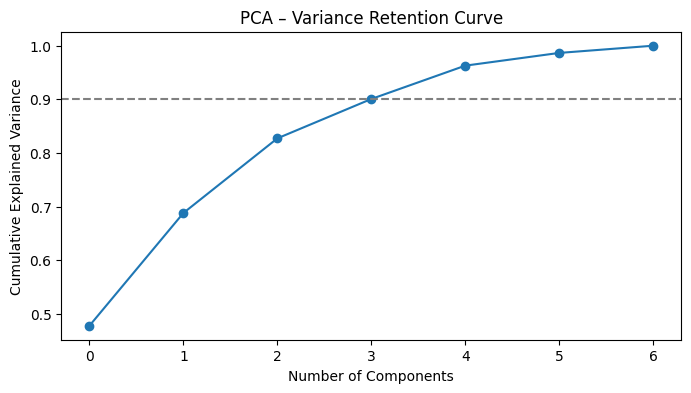

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(
    np.cumsum(explained_variance),
    marker="o"
)
plt.axhline(0.9, linestyle="--", color="gray")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Variance Retention Curve")
plt.show()


✔ Typical thresholds:

- 80% → aggressive compression

- 90% → balanced

- 95% → conservative

## Selecting Number of Components
### 90% Variance PCA

In [8]:
pca_90 = PCA(n_components=0.9)
X_pca_90 = pca_90.fit_transform(X_scaled)

X_pca_90.shape


(5000, 4)

## Component Interpretation
### Loadings

In [9]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(features))],
    index=features
)

loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
age,0.437048,-0.087835,0.369471,-0.065880,-0.623855,-0.519123,-0.041741
annual_income,0.483125,-0.130336,0.282073,0.020840,-0.148479,0.795672,0.120263
avg_monthly_spend,0.403819,-0.146608,0.402107,0.067903,0.759342,-0.268305,-0.023392
credit_utilization,-0.440981,0.067509,0.543727,-0.129430,-0.013906,-0.018735,0.698601
tenure_years,0.143575,0.676192,0.077769,-0.692376,0.089453,0.055067,-0.160261
num_products,0.075505,0.695232,0.129694,0.701801,-0.038815,-0.004873,0.008655
risk_score,-0.437871,-0.093069,0.551115,0.044199,-0.049573,0.148402,-0.685161


In [20]:
for col in loadings.columns:
    print(loadings[col].sort_values(), '\n')

credit_utilization   -0.440981
risk_score           -0.437871
num_products          0.075505
tenure_years          0.143575
avg_monthly_spend     0.403819
age                   0.437048
annual_income         0.483125
Name: PC1, dtype: float64 

avg_monthly_spend    -0.146608
annual_income        -0.130336
risk_score           -0.093069
age                  -0.087835
credit_utilization    0.067509
tenure_years          0.676192
num_products          0.695232
Name: PC2, dtype: float64 

tenure_years          0.077769
num_products          0.129694
annual_income         0.282073
age                   0.369471
avg_monthly_spend     0.402107
credit_utilization    0.543727
risk_score            0.551115
Name: PC3, dtype: float64 

tenure_years         -0.692376
credit_utilization   -0.129430
age                  -0.065880
annual_income         0.020840
risk_score            0.044199
avg_monthly_spend     0.067903
num_products          0.701801
Name: PC4, dtype: float64 

age                 

## Example Interpretation



| Component | Interpretation              |
| --------- | --------------------------- |
| PC1       | Overall wealth & engagement |
| PC2       | Risk vs tenure              |
| PC3       | Usage intensity             |



✔ PCA components often map to latent business factors

## Visualization (2D Projection)
### PCA Scatter

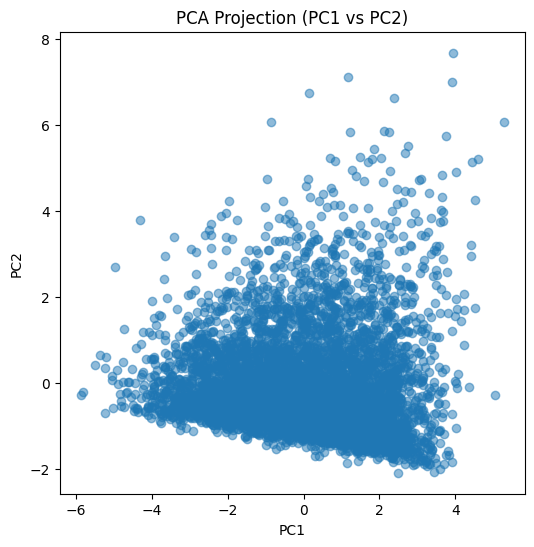

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (PC1 vs PC2)")
plt.show()


# PCA Before Clustering

PCA often improves:

- Distance metrics

- Noise reduction

- Computational efficiency

## PCA + K-Means

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans.fit_predict(X_pca_90)

silhouette_score = __import__("sklearn.metrics").metrics.silhouette_score
silhouette_score(X_pca_90, labels_pca)


np.float64(0.2641035884927173)

Compare with clustering on original features.

## Linear Alternatives to PCA


| Method          | Use Case             |
| --------------- | -------------------- |
| PCA             | Variance compression |
| Truncated SVD   | Sparse data          |
| Factor Analysis | Latent factors       |
| ICA             | Signal separation    |



## Step 10 – When NOT to Use PCA

- `[cons] - ` Strong nonlinear structure
- `[cons] - ` Interpretability required at feature level
- `[cons] - ` Tree-based models (often unnecessary)
- `[cons] - ` Heavy categorical dominance

## Common Mistakes (Avoided)

- `[cons] - ` Skipping scaling
- `[cons] - ` Interpreting components blindly
- `[cons] - ` Using PCA before splitting
- `[cons] - ` Applying PCA to target leakage
- `[cons] - ` Assuming PCA improves all models

## Summary Table


| Aspect           | Recommendation             |
| ---------------- | -------------------------- |
| Scaling          | Mandatory                  |
| Components       | Variance-driven            |
| Interpretability | Use loadings               |
| Use Case         | Compression, visualization |


## Key Takeaways

- PCA is a variance-preserving linear projection

- Scaling is mandatory

- Components often align with business factors

- PCA improves clustering and distance models

- Use PCA intentionally, not automatically

##  Next Notebook
05_Unsupervised_Learning/

└── 02_dimensionality_reduction/
    
 - └── [02_nonlinear_methods.ipynb](02_nonlinear_methods.ipynb)

<br><br><br><br><br>



# Complete: [Data Science Techniques](https://github.com/lei-soares/Data-Science-Techniques)

- [00_Data_Generation_and_Simulation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/00_Data_Generation_and_Simulation)


- [01_Exploratory_Data_Analysis_(EDA)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/01_Exploratory_Data_Analysis_(EDA))


- [02_Data_Preprocessing](https://github.com/lei-soares/Data-Science-Techniques/tree/main/02_Data_Preprocessing)


- [03_Feature_Engineering](https://github.com/lei-soares/Data-Science-Techniques/tree/main/03_Feature_Engineering)


- [04_Supervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

    - [Regression Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/01_regression_models)
    
    - [Classification Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/02_classification_models)


- [05_Unsupervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/05_Unsupervised_Learning)


- [06_Model_Evaluation_and_Validation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/06_Model_Evaluation_and_Validation)


- [07_Model_Tuning_and_Optimization](https://github.com/lei-soares/Data-Science-Techniques/tree/main/07_Model_Tuning_and_Optimization)


- [08_Interpretability_and_Explainability](https://github.com/lei-soares/Data-Science-Techniques/tree/main/08_Interpretability_and_Explainability)


- [09_Pipelines_and_Workflows](https://github.com/lei-soares/Data-Science-Techniques/tree/main/09_Pipelines_and_Workflows)


- [10_Natural_Language_Processing_(NLP)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/10_Natural_Language_Processing_(NLP))


- [11_Time_Series](https://github.com/lei-soares/Data-Science-Techniques/tree/main/11_Time_Series)


- [12_Anomaly_and_Fraud_Detection](https://github.com/lei-soares/Data-Science-Techniques/tree/main/12_Anomaly_and_Fraud_Detection)


- [13_Imbalanced_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/13_Imbalanced_Learning)


- [14_Deployment_and_Production_Concepts](https://github.com/lei-soares/Data-Science-Techniques/tree/main/14_Deployment_and_Production_Concepts)


- [15_Business_and_Experimental_Design](https://github.com/lei-soares/Data-Science-Techniques/tree/main/15_Business_and_Experimental_Design)




<br><br><br><br><br>

[Panfugo Dados](www.pantufodados.com)


[Pantufo Dados - YouTube Channel](https://www.youtube.com/@pantufodados)

<br><br><br><br><br>



# Complete: [Data Science Techniques](https://github.com/lei-soares/Data-Science-Techniques)

- [00_Data_Generation_and_Simulation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/00_Data_Generation_and_Simulation)


- [01_Exploratory_Data_Analysis_(EDA)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/01_Exploratory_Data_Analysis_(EDA))


- [02_Data_Preprocessing](https://github.com/lei-soares/Data-Science-Techniques/tree/main/02_Data_Preprocessing)


- [03_Feature_Engineering](https://github.com/lei-soares/Data-Science-Techniques/tree/main/03_Feature_Engineering)


- [04_Supervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

    - [Regression Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/01_regression_models)
    
    - [Classification Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/02_classification_models)


- [05_Unsupervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/05_Unsupervised_Learning)


- [06_Model_Evaluation_and_Validation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/06_Model_Evaluation_and_Validation)


- [07_Model_Tuning_and_Optimization](https://github.com/lei-soares/Data-Science-Techniques/tree/main/07_Model_Tuning_and_Optimization)


- [08_Interpretability_and_Explainability](https://github.com/lei-soares/Data-Science-Techniques/tree/main/08_Interpretability_and_Explainability)


- [09_Pipelines_and_Workflows](https://github.com/lei-soares/Data-Science-Techniques/tree/main/09_Pipelines_and_Workflows)


- [10_Natural_Language_Processing_(NLP)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/10_Natural_Language_Processing_(NLP))


- [11_Time_Series](https://github.com/lei-soares/Data-Science-Techniques/tree/main/11_Time_Series)


- [12_Anomaly_and_Fraud_Detection](https://github.com/lei-soares/Data-Science-Techniques/tree/main/12_Anomaly_and_Fraud_Detection)


- [13_Imbalanced_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/13_Imbalanced_Learning)


- [14_Deployment_and_Production_Concepts](https://github.com/lei-soares/Data-Science-Techniques/tree/main/14_Deployment_and_Production_Concepts)


- [15_Business_and_Experimental_Design](https://github.com/lei-soares/Data-Science-Techniques/tree/main/15_Business_and_Experimental_Design)




<br><br><br><br><br>

[Panfugo Dados](www.pantufodados.com)


[Pantufo Dados - YouTube Channel](https://www.youtube.com/@pantufodados)